### Домашнее задание

Возьмите датасет https://www.kaggle.com/ajayrana/hymenoptera-data

Реализуйте сверточную нейронную сеть с использованием tf.keras или keras. Используйте сверточные, пуллинговые и полносвязанные слои. Обучите на train выборке в течении 10 эпох, оцените качество на отложенной выборке

Добавьте в предыдущую архитектуру слои BatchNorm. Обучите на train выборке в течении 10 эпох, оцените качество на отложенной выборке

Создайте модель ResNet 50 (https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50), инициализированную случайными весами, и обучите ее на train выборке в течении 10 эпох, оцените качество на отложенной выборке

Создайте модель ResNet 50, инициализированную весами ImageNet, и обучите ее на train выборке в течении 10 эпох, оцените качество на отложенной выборке

Результат пришлите в виде Jupyter Notebook на github’е или расшаренного Google Colab-блокнота

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [25]:
def loss_plot(m):
    plt.plot(m.history['loss'], label='train loss')
    plt.plot(m.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()
    
def accuracy_plot(m):
    plt.plot(m.history['accuracy'], label='train accuracy')
    plt.plot(m.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.show()

In [3]:
train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [4]:
train = train_generator.flow_from_directory('hymenoptera_data/train', target_size=(224, 224), batch_size=64, class_mode='binary')
test = test_generator.flow_from_directory('hymenoptera_data/val', target_size=(224, 224), batch_size=64, class_mode='binary')

Found 244 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


Реализуем сверточную нейронную сеть с использованием keras. Используем сверточные, пуллинговые и полносвязанные слои. Обучим на train выборке в течении 10 эпох, оценим качество на отложенной выборке.

In [6]:
i = keras.layers.Input(shape=(224,224,3))
o = keras.layers.Conv2D(32, (5,5), strides=(3,3))(i)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.Conv2D(64, (3,3))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.Conv2D(16, (3,3), strides=(1,1))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.Flatten()(o)
o = keras.layers.Dense(1, activation='sigmoid')(o)

In [7]:
model = keras.Model(inputs=i, outputs=o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 74, 74, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 32)        0         
_________________________________________________________________
re_lu (ReLU)                 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
re_lu_1 (ReLU)               (None, 17, 17, 64)        0     

In [8]:
%%time

history = model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
4/4 [==============================] - 12s 3s/step - loss: 0.6954 - accuracy: 0.4916 - val_loss: 0.6905 - val_accuracy: 0.4706
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 0.6786 - accuracy: 0.5953 - val_loss: 0.6831 - val_accuracy: 0.5621
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 0.6764 - accuracy: 0.6083 - val_loss: 0.6717 - val_accuracy: 0.5882
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 0.6575 - accuracy: 0.6436 - val_loss: 0.7045 - val_accuracy: 0.4641
Epoch 5/10
4/4 [==============================] - 6s 1s/step - loss: 0.6570 - accuracy: 0.5984 - val_loss: 0.6731 - val_accuracy: 0.5752
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 0.6510 - accuracy: 0.5828 - val_loss: 0.6622 - val_accuracy: 0.6144
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 0.6240 - accuracy: 0.6256 - val_loss: 0.6867 - val_accuracy: 0.5621
Epoch 8/10
4/4 [========================

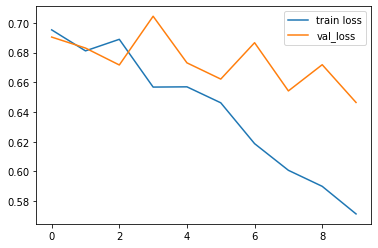

In [9]:
loss_plot(history)

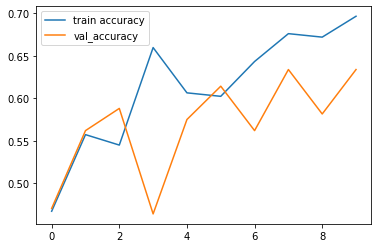

In [10]:
accuracy_plot(history)

Добавим в предыдущую архитектуру слои BatchNorm. Обучим на train выборке в течении 10 эпох, оценим качество на отложенной выборке

In [12]:
i = keras.layers.Input(shape=(224,224,3))
o = keras.layers.BatchNormalization()(i)
o = keras.layers.Conv2D(32, (5,5), strides=(3,3))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.BatchNormalization()(o)
o = keras.layers.ReLU()(o)
o = keras.layers.Conv2D(642, (3,3))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.BatchNormalization()(o)
o = keras.layers.ReLU()(o)
o = keras.layers.Conv2D(16, (3,3), strides=(1,1))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.BatchNormalization()(o)
o = keras.layers.ReLU()(o)
o = keras.layers.Flatten()(o)
o = keras.layers.Dense(1, activation='sigmoid')(o)

In [13]:
model = keras.Model(inputs=i, outputs=o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 74, 74, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 37, 37, 32)        128       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 35, 35, 642)       1855

In [14]:
%%time

history = model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
4/4 [==============================] - 26s 7s/step - loss: 0.7152 - accuracy: 0.5537 - val_loss: 0.6831 - val_accuracy: 0.5621
Epoch 2/10
4/4 [==============================] - 24s 6s/step - loss: 0.4329 - accuracy: 0.8339 - val_loss: 0.6829 - val_accuracy: 0.5752
Epoch 3/10
4/4 [==============================] - 24s 6s/step - loss: 0.3201 - accuracy: 0.9537 - val_loss: 0.6874 - val_accuracy: 0.5817
Epoch 4/10
4/4 [==============================] - 23s 6s/step - loss: 0.2393 - accuracy: 0.9700 - val_loss: 0.6949 - val_accuracy: 0.4706
Epoch 5/10
4/4 [==============================] - 23s 6s/step - loss: 0.1710 - accuracy: 0.9759 - val_loss: 0.7025 - val_accuracy: 0.4575
Epoch 6/10
4/4 [==============================] - 24s 6s/step - loss: 0.1122 - accuracy: 0.9972 - val_loss: 0.7176 - val_accuracy: 0.4575
Epoch 7/10
4/4 [==============================] - 23s 6s/step - loss: 0.0733 - accuracy: 0.9957 - val_loss: 0.7334 - val_accuracy: 0.4575
Epoch 8/10
4/4 [==================

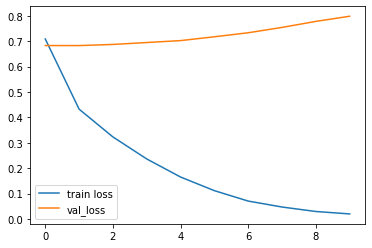

In [15]:
loss_plot(history)

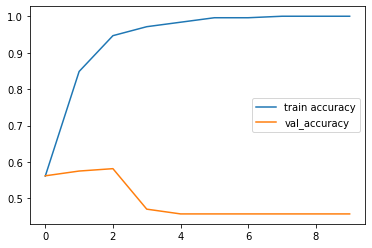

In [16]:
accuracy_plot(history)

Создадим модель ResNet 50, инициализированную случайными весами, и обучим ее на train выборке в течении 10 эпох, оценим качество на отложенной выборке

In [27]:
ResNet50 = keras.applications.ResNet50(
    include_top=False, weights=None, input_tensor=None, input_shape=None,
    pooling=None, classes=1000
)

In [28]:
i = keras.layers.Input((224, 224, 3), dtype = tf.uint8)
o = tf.cast(i, tf.float32)
o = ResNet50(o)
o = keras.layers.Flatten()(o)
o = keras.layers.Dense(1, activation='sigmoid')(o)

In [29]:
model = keras.Model(inputs=i, outputs=o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.cast_1 (TFOpLambda)       (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 100353    
Total params: 23,688,065
Trainable params: 23,634,945
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
%%time

history = model.fit(train, epochs=10, validation_data=test)

Epoch 1/10


In [ ]:
loss_plot(history)

In [ ]:
accuracy_plot(history)

Создадим модель ResNet 50, инициализированную весами ImageNet, и обучим ее на train выборке в течении 10 эпох, оценим качество на отложенной выборке

In [18]:
ResNet50 = keras.applications.ResNet50(
    include_top=False, weights='imagenet', input_tensor=None, input_shape=None,
    pooling=None, classes=1000
)

ResNet50.trainable = False

In [19]:
i = keras.layers.Input((224, 224, 3), dtype = tf.uint8)
o = tf.cast(i, tf.float32)
o = ResNet50(o)
o = keras.layers.Flatten()(o)
o = keras.layers.Dense(1, activation='sigmoid')(o)

In [20]:
model = keras.Model(inputs=i, outputs=o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.cast (TFOpLambda)         (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 100353    
Total params: 23,688,065
Trainable params: 100,353
Non-trainable params: 23,587,712
_________________________________________________________________


In [21]:
%%time

history = model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
4/4 [==============================] - 97s 27s/step - loss: 2.4010 - accuracy: 0.4894 - val_loss: 4.2772 - val_accuracy: 0.4575
Epoch 2/10
4/4 [==============================] - 91s 25s/step - loss: 2.8665 - accuracy: 0.5430 - val_loss: 2.0374 - val_accuracy: 0.5425
Epoch 3/10
4/4 [==============================] - 92s 26s/step - loss: 2.1059 - accuracy: 0.5176 - val_loss: 1.1069 - val_accuracy: 0.4575
Epoch 4/10
4/4 [==============================] - 93s 26s/step - loss: 1.3201 - accuracy: 0.5006 - val_loss: 0.7479 - val_accuracy: 0.4575
Epoch 5/10
4/4 [==============================] - 91s 25s/step - loss: 0.9974 - accuracy: 0.5119 - val_loss: 0.8327 - val_accuracy: 0.5359
Epoch 6/10
4/4 [==============================] - 91s 25s/step - loss: 0.7682 - accuracy: 0.5733 - val_loss: 0.9706 - val_accuracy: 0.4575
Epoch 7/10
4/4 [==============================] - 92s 25s/step - loss: 0.8469 - accuracy: 0.5004 - val_loss: 0.8030 - val_accuracy: 0.5294
Epoch 8/10
4/4 [===========

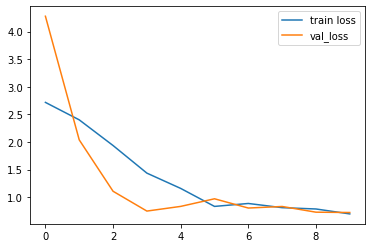

In [22]:
loss_plot(history)

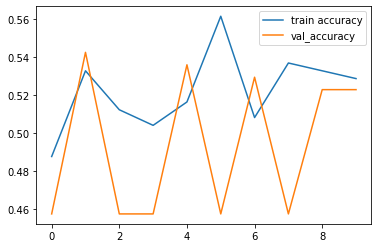

In [23]:
accuracy_plot(history)